In [82]:
import sys
sys.path.append('/Users/gbibim/Here/hpt')

# List all modules and packages available at this path
import os
print(os.listdir('/Users/gbibim/Here/hpt'))


['VJets.ipynb', 'outparquet', 'LICENSE', 'requirements.txt', 'pyproject.toml', 'README.md', '.gitignore', 'print_parquet.py', 'outfiles', '.git', 'data', 'src']


In [83]:

from hpt import utils

#import mplhep as hep
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import mplhep as hep

import hist

formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 3))
plt.rcParams.update({"font.size": 12})
plt.rcParams["lines.linewidth"] = 2
plt.rcParams["grid.color"] = "#CCCCCC"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams["figure.edgecolor"] = "none"

In [84]:
# automatically reloads imported files on edits
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [85]:
vpt_axis = hist.axis.Regular(80, 0, 1000, name="pt", label="Z pT [GeV]")
cat_axis = hist.axis.StrCategory([], name="cat", growth=True)

In [86]:
MAIN_DIR = "/Users/gbibim/Here/genZ"
dir_name = "data"
path_to_dir = f"{MAIN_DIR}/{dir_name}/"
is_LO = False # True for LO, False for NLO

if is_LO:
    samples = {
        "Zto2Q-4Jets_HT-200-400": [
            "Zto2Q-4Jets_HT-200to400",
        ],
        "Zto2Q-4Jets_HT-400-600": [
            "Zto2Q-4Jets_HT-400to600",
        ],
        "Zto2Q-4Jets_HT-600-800": [
            "Zto2Q-4Jets_HT-600to800",
        ],
        "Zto2Q-4Jets_HT-800-Inf": [
            "Zto2Q-4Jets_HT-800",
        ],
    }
else:
    samples = {
        "Zto2Q-2Jets_PTQQ-100-200": [
            "Zto2Q-2Jets_PTQQ-100to200_1J",
            "Zto2Q-2Jets_PTQQ-100to200_2J",
        ],
        "Zto2Q-2Jets_PTQQ-200-400": [
            "Zto2Q-2Jets_PTQQ-200to400_1J",
            "Zto2Q-2Jets_PTQQ-200to400_2J",
        ],
        "Zto2Q-2Jets_PTQQ-400-600": [
            "Zto2Q-2Jets_PTQQ-400to600_1J",
            "Zto2Q-2Jets_PTQQ-400to600_2J",
        ],
        "Zto2Q-2Jets_PTQQ-600": [
            "Zto2Q-2Jets_PTQQ-600_1J",
            "Zto2Q-2Jets_PTQQ-600_2J",
        ],
    }
dirs = {path_to_dir: samples}

load_columns = [
    ("weight", 1),
    ("GenVPt", 1),
    # ("bbFatJetPNetTXbb", 2),
]


In [87]:

events_dict = {}
years = ["2023"]
for year in years:
    events_dict[year] = {}
    for input_dir, samples in dirs.items():
        events_dict[year] = {
            **events_dict[year],
            **utils.load_samples(
                input_dir,
                samples,
                year,
                variations=False,
                reorder_txbb=False,
                txbb="bbFatJetPNetTXbb",
                columns=utils.format_columns(load_columns),
            ),
        }

Loading Zto2Q-2Jets_PTQQ-100to200_1J
Loaded Zto2Q-2Jets_PTQQ-100to200_1J                      : 18998967 entries
Loading Zto2Q-2Jets_PTQQ-100to200_2J
Loaded Zto2Q-2Jets_PTQQ-100to200_2J                      : 18555240 entries
Loading Zto2Q-2Jets_PTQQ-200to400_2J
Loaded Zto2Q-2Jets_PTQQ-200to400_2J                      : 20014819 entries
Loading Zto2Q-2Jets_PTQQ-200to400_1J
Loaded Zto2Q-2Jets_PTQQ-200to400_1J                      : 7929898 entries
Loading Zto2Q-2Jets_PTQQ-400to600_2J
Loaded Zto2Q-2Jets_PTQQ-400to600_2J                      : 1345579 entries
Loading Zto2Q-2Jets_PTQQ-400to600_1J
Loaded Zto2Q-2Jets_PTQQ-400to600_1J                      : 971914 entries
Loading Zto2Q-2Jets_PTQQ-600_2J
Loaded Zto2Q-2Jets_PTQQ-600_2J                           : 1023252 entries
Loading Zto2Q-2Jets_PTQQ-600_1J
Loaded Zto2Q-2Jets_PTQQ-600_1J                           : 1043033 entries


In [88]:
def plot_h(hists, labels, density, title):
    fig, ax = plt.subplots(1, 1, figsize=(6, 5))
    for hkey, h in hists.items():
        hep.histplot(h, ax=ax, label=labels[hkey], density=density)
    ax.legend(title=f"Pre-Selection")
    if density:
        ax.set_ylabel("Density")
    else:
        ax.set_ylabel("Events")
    ax.set_title(title)
    ax.xaxis.grid(True, which="major")
    ax.yaxis.grid(True, which="major")

In [89]:
h_vpt = hist.Hist(vpt_axis, cat_axis)
events = events_dict["2023"]
for sample in events:
    weight = events[sample]["finalWeight"]
    vpt = events[sample]["GenVPt"][0]
    h_vpt.fill(vpt, sample, weight=weight)

In [90]:
h_vpt

Hist(
  Regular(80, 0, 1000, name='pt', label='Z pT [GeV]'),
  StrCategory(['Zto2Q-2Jets_PTQQ-100-200', 'Zto2Q-2Jets_PTQQ-200-400', 'Zto2Q-2Jets_PTQQ-400-600', 'Zto2Q-2Jets_PTQQ-600'], growth=True, name='cat'),
  storage=Double()) # Sum: 12704914.436879242 (12705416.936730238 with flow)

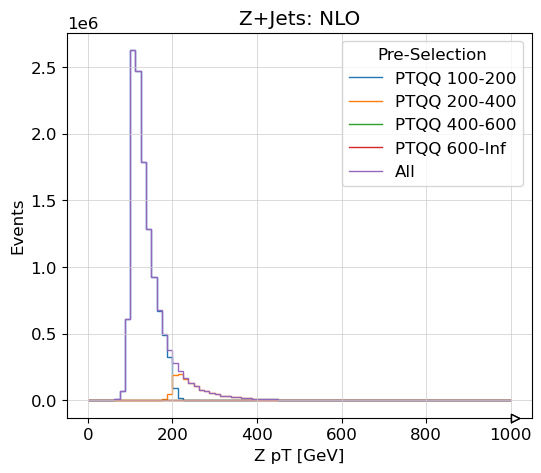

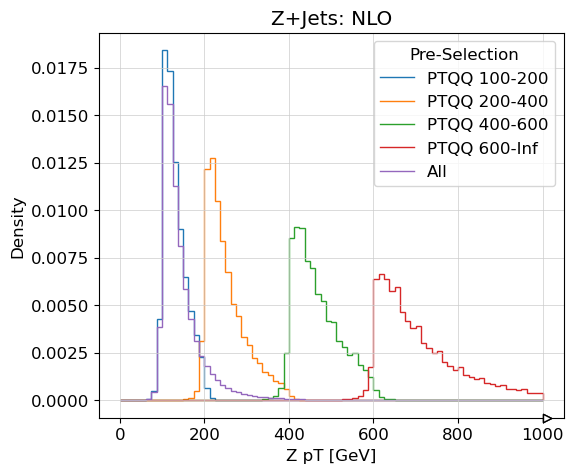

In [91]:
h_to_plot = h_vpt
if is_LO:
    hists = {
        "200to400": h_to_plot[{"cat": "Zto2Q-4Jets_HT-200-400"}],
        "400to600": h_to_plot[{"cat": "Zto2Q-4Jets_HT-400-600"}],
        "600to800": h_to_plot[{"cat": "Zto2Q-4Jets_HT-600-800"}],
        "800": h_to_plot[{"cat": "Zto2Q-4Jets_HT-800-Inf"}],
    }
    hists["sum"] = sum([h for h in hists.values()])
    labels = {
        "200to400": "HT 200-400",
        "400to600": "HT 400-600",
        "600to800": "HT 600-800",
        "800": "HT 800-Inf",
        "sum": "All",
        "lo": "LO",
        "nlo": "NLO",
    }
    plot_h(hists, labels, density=False, title="Z+Jets: LO")
    plot_h(hists, labels, density=True, title="Z+Jets: LO")
else:
    hists = {
        "100to200": h_to_plot[{"cat": f"{v}to2Q-2Jets_PTQQ-100-200"}],
        "200to400": h_to_plot[{"cat": f"{v}to2Q-2Jets_PTQQ-200-400"}],
        "400to600": h_to_plot[{"cat": f"{v}to2Q-2Jets_PTQQ-400-600"}],
        "600": h_to_plot[{"cat": f"{v}to2Q-2Jets_PTQQ-600"}],
    }
    hists["sum"] = sum([h for h in hists.values()])
    labels = {
        "100to200": "PTQQ 100-200",
        "200to400": "PTQQ 200-400",
        "400to600": "PTQQ 400-600",
        "600": "PTQQ 600-Inf",
        "sum": "All",
        "lo": "LO",
        "nlo": "NLO",
    }
    plot_h(hists, labels, density=False, title=f"{v}+Jets: NLO")
    plot_h(hists, labels, density=True, title=f"{v}+Jets: NLO")

    #hists["lo"] = h_to_plot[{"cat": f"{v}to2Q_LO"}]
    #plot_h({"lo": hists["lo"], "nlo": hists["sum"]}, labels, density=False, title=f"{v}+Jets")